# 英國脫歐文字探勘

TF-IDF練習:使用2019英國脫歐相關新聞

### TF-IDF練習:使用英國脫歐的相關新聞

In [1]:
from collections import Counter
import jieba
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import sys
sys.path.insert(0, '../modules/')

from fintextmin import *  # 使用 modules 中的 fintextmin 模組

### 從指定路徑中讀入新聞資料

In [2]:
text_list = read_text_folder("./dataset/")
print("document number:", len(text_list))

document number: 10


### 製作詞頻矩陣
下面以 Python 實現製作詞頻矩陣的步驟，並附上對應的`fintextmin`函式

In [3]:
def add_word(list):
    for items in list:
        jieba.add_word(items)

add_word(['那斯達克指數','鄧恩', '艾藍','Emergency Food Storage UK', 'John Allan', 'TransferWise', '威廉姆森', '漢考克','馬斯','汽車製造商和貿易商協會','霍斯','Mike Hawes','英國工業總會','CBI','SMMT','Heiko Maas','下議院','劉必榮','POP撞新聞','onald Tusk','EuropeanCouncil','榮科','圖斯克','瓦拉德卡','Leo Varadkar','Theresa May','The Sun','梅伊', '脫歐協議','太陽報','梅克爾','反對黨','工黨','歐洲議會','柯賓' ,'Stoxx','道瓊工業指數','Kospi 指數' ,'深證' ,'DAX 指數','保守黨'])

Building prefix dict from the default dictionary ...
Loading model from cache /var/folders/yj/b2sj8k396ts1dld08589ctwc0000gn/T/jieba.cache
Loading model cost 0.686 seconds.
Prefix dict has been built succesfully.


In [4]:
## [原生 python 寫法]
doc_names = range(len(text_list))
dwc = {key: [word for word in jieba.cut(text, cut_all=False)] for (key, text) in zip(doc_names, text_list)}


## [使用 fintextmin 模組]
# stopwords = [] 
# dwc = count_words_in_documents(doc_list = text_list,
#                               doc_names = range(len(text_list)),
#                                stopwords = stopwords)

In [6]:
## [使用 fintextmin 模組]
stopwords = ['的', '是', '在', '有', '就', '獲', '不' , '會', '若', '而', '這', '該', 'ETtoday', '被' , '\ufeff' , '...' ,' '] 
dwc = count_words_in_documents(doc_list = text_list,
                              doc_names = range(len(text_list)),
                              stopwords = stopwords)

In [7]:
## [原生 python 寫法] 
doc_word_frequency = {key: {i:Counter(doc)[i] for i in Counter(doc)} for key, doc in dwc.items()}
list(doc_word_frequency[0].items())[0:10] # 顯示第一篇文章的部份詞彙與對應詞頻

## [使用 fintextmin 寫法]
# doc_word_frequency = create_word_frequency_matrix(dwc)

[('若英國', 2),
 ('脫歐協議', 5),
 ('獲國會', 2),
 ('通過', 3),
 ('傳', 2),
 ('梅克爾', 3),
 ('說服', 3),
 ('歐盟', 3),
 ('讓', 3),
 ('步英國', 1)]

In [8]:
## [原生 python 寫法] 
dwf_list = [pd.DataFrame(list(doc.values()), index=doc.keys()) for doc in doc_word_frequency.values()]
wfm = pd.concat(dwf_list, axis= 1)
wfm = np.transpose(wfm).fillna(0)
wfm.index = doc_word_frequency.keys()

puncs = set_puncs() # 因為一開始沒有清除標點符號,這邊回過頭來將它們自矩陣移除
wfm = wfm[list(set(wfm) - set(puncs))]
wfm # 詞頻矩陣完成

## [使用 fintextmin 寫法]
# wfm = create_word_frequency_matrix(dwc)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  This is separate from the ipykernel package so we can avoid doing imports until


,狂瀾,過,執行長,全民,指出,計畫,一窩蜂,提前,採取,程度,...,表示,德國,微,但是,對,這間,網址,調查,稱,此外
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,3.0,0.0,0.0,0.0,1.0,1.0,...,2.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,3.0,0.0,0.0,0.0,0.0,1.0
6,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,3.0,0.0,...,0.0,0.0,0.0,1.0,9.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,1.0,0.0,0.0,5.0,0.0,0.0,0.0,1.0,0.0
9,1.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,...,12.0,4.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0


### 製作TF-IDF矩陣
可以將完成後的tf-idf矩陣與上面的詞頻矩陣比較一下係數

In [9]:
from sklearn import feature_extraction
from sklearn.feature_extraction.text import TfidfTransformer

## [原生 python 寫法] 
transformer = TfidfTransformer()
tfidf_gen = transformer.fit_transform(wfm) # 產生一個 tfidf 矩陣的 generator
df_tfidf = pd.DataFrame(tfidf_gen.toarray(), columns=wfm.columns)
df_tfidf

## [使用 fintextmin 寫法]
# df_tfidf = evaluate_tfidf(wfm) 

,狂瀾,過,執行長,全民,指出,計畫,一窩蜂,提前,採取,程度,...,表示,德國,微,但是,對,這間,網址,調查,稱,此外
0,0.000000,0.081985,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.048684,0.000000,0.000000,0.036394,0.000000,0.081985,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.082254,0.000000,0.069924
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.120391,0.000000,0.000000,...,0.032315,0.000000,0.000000,0.000000,0.026721,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.055163,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.034835,0.038534,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.062022,0.000000,0.158174,0.000000,0.000000,0.000000,0.052725,0.062022,...,0.066591,0.000000,0.000000,0.000000,0.082597,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.028033,0.047208,0.000000,0.062869,0.000000,0.000000,0.000000,0.000000,0.040131
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.043499,0.000000,0.000000,0.000000,...,0.023352,0.000000,0.000000,0.000000,0.019310,0.043499,0.000000,0.000000,0.000000,0.000000
7,0.000000,0.000000,0.000000,0.027639,0.000000,0.000000,0.000000,0.000000,0.070487,0.000000,...,0.000000,0.000000,0.000000,0.027639,0.110423,0.000000,0.000000,0.000000,0.000000,0.000000
8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.051955,0.028735,0.000000,0.000000,0.107406,0.000000,0.000000,0.000000,0.048391,0.000000
9,0.034192,0.000000,0.000000,0.000000,0.000000,0.068384,0.000000,0.000000,0.000000,0.000000,...,0.220261,0.081215,0.000000,0.000000,0.121425,0.000000,0.000000,0.000000,0.000000,0.000000


### 視覺化TFIDF和原本詞頻矩陣的差異

這邊我們取第一篇文章來比較看看調整前後的詞彙係數

In [10]:
first_text = wfm.to_dict(orient='records')[0] # 將詞頻矩陣轉換成dictionary型別, 把第一篇文章抽出來
list(first_text.items())[0:10] # 檢視一下轉換結果

[('狂瀾', 0.0),
 ('過', 1.0),
 ('執行長', 0.0),
 ('全民', 0.0),
 ('指出', 0.0),
 ('計畫', 0.0),
 ('一窩蜂', 0.0),
 ('提前', 0.0),
 ('採取', 0.0),
 ('程度', 0.0)]

### 文字雲

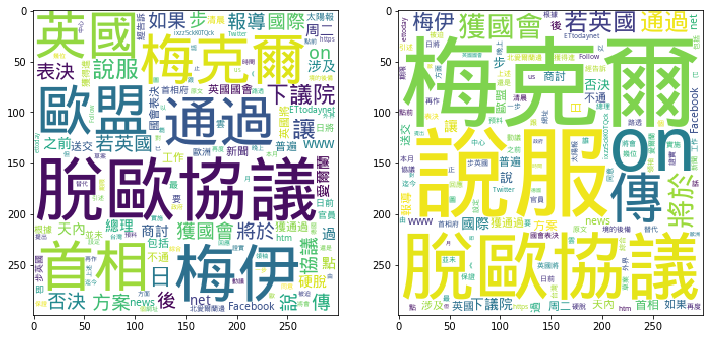

In [11]:
linux_font = r'/Users/leeyishan/Documents/GitHub/g10716005/week_05/wqy-microhei.ttc'
#記得自行需要下載，與修改路徑 
plt.figure(figsize=(12, 6))
ax1 = plt.subplot(121)
plot_wordcloud(first_text, ax=ax1, font_path=linux_font, height=300, width=300)

ax2 = plt.subplot(122)
plot_tfidf_wordcloud(df_tfidf, text_index=0, ax=ax2, font_path=linux_font, height=300, width=300) 

###### 

### 長條圖
可以發現，經過TF-IDF處理之後，比較重要的資訊如「股價」、「747」(註：此指波音747)等詞彙被突顯出來。

每篇文章都會出現的「華航」和所有格用字「的」排序則向下調整。

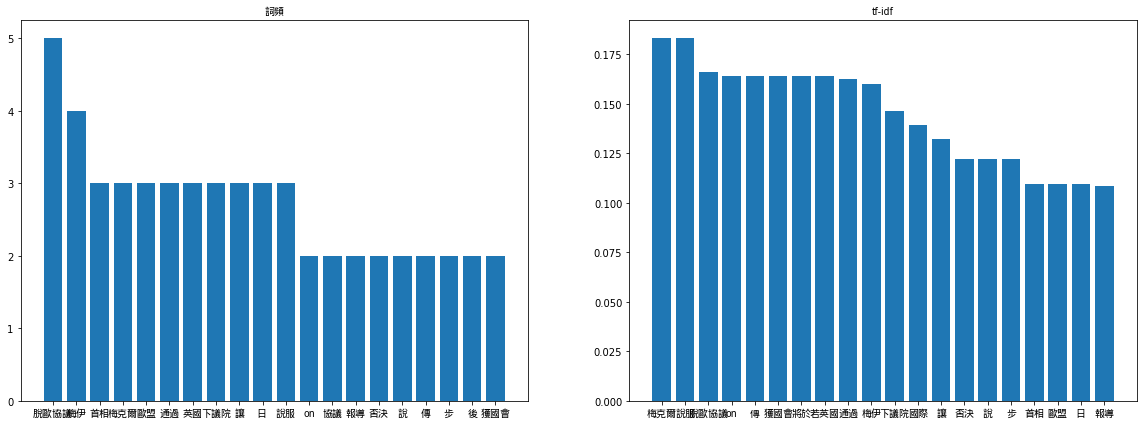

In [12]:
plt.figure(figsize=(20, 7))
ax1 = plt.subplot(121)
plot_tf_bar(first_text, ax=ax1, font_path=linux_font, title="詞頻")

ax2 = plt.subplot(122)
plot_tfidf_bar(df_tfidf, text_index=0, ax=ax2, font_path=linux_font, title="tf-idf") 